This dataset from Home Credit is quite rich and multifaceted, providing insights into various aspects of clients' credit history and behavior. 

Here’s a breakdown of the structure and potential relationships across the tables in its seven datasets:

1. **`application_train` / `application_test`**:
   - **Description**: These tables contain the primary data on each loan application. The `application_train` includes a `TARGET` variable, where `0` indicates the loan was repaid and `1` indicates default.
   - **Primary Key**: `SK_ID_CURR` (unique to each loan application).
   - **Relationships**: 
     - Connects to other tables through `SK_ID_CURR`.

2. **`bureau`**:
   - **Description**: This table contains records of clients’ previous credits from other financial institutions.
   - **Primary Key**: `SK_ID_BUREAU`.
   - **Relationships**: 
     - Connects to `application` tables via `SK_ID_CURR`.

3. **`bureau_balance`**:
   - **Description**: Monthly data on previous credits recorded in the `bureau` table.
   - **Primary Key**: Each row represents a monthly snapshot.
   - **Relationships**: 
     - Connects to `bureau` via `SK_ID_BUREAU`.

4. **`previous_application`**:
   - **Description**: Data on past loan applications of clients at Home Credit.
   - **Primary Key**: `SK_ID_PREV` (unique identifier for each previous application).
   - **Relationships**: 
     - Connects to `application` tables via `SK_ID_CURR`.

5. **`POS_CASH_BALANCE`**:
   - **Description**: Monthly data on previous point-of-sale or cash loans.
   - **Primary Key**: Each row represents one month of loan activity.
   - **Relationships**: 
     - Connects to `previous_application` via `SK_ID_PREV`.

6. **`credit_card_balance`**:
   - **Description**: Monthly data on previous credit card usage.
   - **Primary Key**: Each row represents a monthly balance snapshot.
   - **Relationships**: 
     - Connects to `previous_application` via `SK_ID_PREV`.

7. **`installments_payment`**:
   - **Description**: Records of past loan installment payments, including both made and missed payments.
   - **Primary Key**: Each row represents a payment event.
   - **Relationships**: 
     - Connects to `previous_application` via `SK_ID_PREV`.

### Relational Diagram

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

The **objective** of this notebook is to create a random **10% sample** of the full dataset, allowing for efficient analysis and model testing despite limited computational resources. Since my computer’s RAM is small, working with a reduced dataset will not only save time but also enhance performance during model training and testing. By using a random sampling approach, we can ensure the sample closely resembles the distribution of the entire dataset, providing reliable insights while maximizing efficiency.

In [4]:
import pandas as pd
import numpy as np

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# import the functions from the file
from notebook_setup import RootPath, config
from my_functions import pie_plot

# Automatically Reload Changes if there are frequent changes to my xx.py file
%load_ext autoreload
%autoreload 2

In [5]:
# Load the 7 original data sources

app = pd.read_csv(f'{config.RawDataPath}application_train.csv')
print('Application data shape:', app.shape, '\n')

bureau = pd.read_csv(f'{config.RawDataPath}bureau.csv')
print('Bureau data shape:', bureau.shape, '\n')

bureau_balance = pd.read_csv(f'{config.RawDataPath}bureau_balance.csv')
print('Bureau Balance data shape:', bureau_balance.shape, '\n')

previous = pd.read_csv(f'{config.RawDataPath}previous_application.csv')
print('Previous data shape:', previous.shape, '\n')

cash = pd.read_csv(f'{config.RawDataPath}POS_CASH_balance.csv')
print('Cash data shape:', cash.shape, '\n')

instalments = pd.read_csv(f'{config.RawDataPath}installments_payments.csv')
print('Instalments data shape:', instalments.shape, '\n')

credit = pd.read_csv(f'{config.RawDataPath}credit_card_balance.csv')
print('Credit data shape:', credit.shape)

Application data shape: (307511, 122) 

Bureau data shape: (1716428, 17) 

Bureau Balance data shape: (27299925, 3) 

Previous data shape: (1670214, 37) 

Cash data shape: (10001358, 8) 

Instalments data shape: (13605401, 8) 

Credit data shape: (3840312, 23)


In [6]:
# Sample 10% of the application data
app_sample = app.sample(frac=0.1, random_state=45)
print(app_sample.shape)
app_sample.head()

(30751, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
179042,307474,0,Cash loans,F,Y,N,0,67500.0,1030302.0,40860.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
269683,412537,0,Cash loans,F,Y,Y,0,90000.0,253737.0,26775.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
42405,149084,0,Cash loans,M,Y,Y,0,270000.0,1006920.0,45499.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
228527,364692,0,Cash loans,M,Y,Y,2,202500.0,495351.0,29497.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
47854,155423,0,Cash loans,M,Y,Y,0,162000.0,264159.0,13617.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


From the figures below, we can see that the distribution of the Target feature is similar in both the **sample** and the **original** dataset. This suggests that the random sampling will likely yield similar results to those obtained using the full dataset.


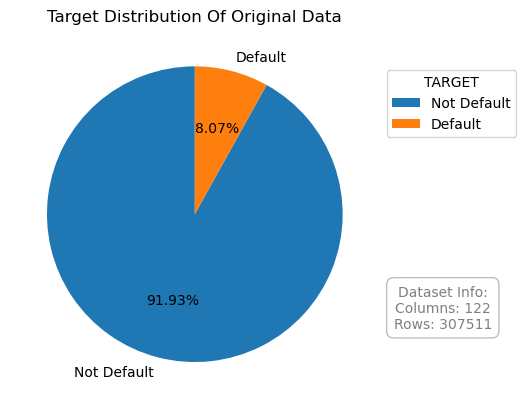

In [8]:
pie_plot(app, column='TARGET', title='Target Distribution Of Original Data', 
         labels=None, save_path=f"{config.AssetPath}target_dist_original.png")


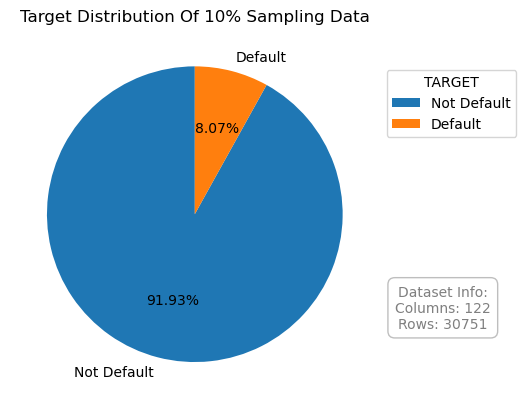

In [9]:
pie_plot(app_sample, column='TARGET', title='Target Distribution Of 10% Sampling Data', 
         labels=None, save_path=f"{config.AssetPath}target_dist_sampling.png")

This code tracks the key IDs from the application data across the other six datasets to ensure that all data can be accurately combined.

In [11]:
# Step 1: Get unique 'SK_ID_CURR' IDs
sampled_sk_id_curr = app_sample['SK_ID_CURR'].unique() 

# Step 2: Filter related tables based on 'SK_ID_CURR' from the sample in 'app'
bureau_sample = bureau[bureau['SK_ID_CURR'].isin(sampled_sk_id_curr)]
previous_sample = previous[previous['SK_ID_CURR'].isin(sampled_sk_id_curr)]

# Step 3: Get 'SK_ID_BUREAU' and 'SK_ID_PREV' from sampled 'bureau' and 'previous' tables
sampled_sk_id_bureau = bureau_sample['SK_ID_BUREAU'].unique()
sampled_sk_id_prev = previous_sample['SK_ID_PREV'].unique()

# Step 4: Filter further related tables based on 'SK_ID_BUREAU' and 'SK_ID_PREV'
bureau_balance_sample = bureau_balance[bureau_balance['SK_ID_BUREAU'].isin(sampled_sk_id_bureau)]
cash_sample = cash[cash['SK_ID_PREV'].isin(sampled_sk_id_prev)]
instalments_sample = instalments[instalments['SK_ID_PREV'].isin(sampled_sk_id_prev)]
credit_sample = credit[credit['SK_ID_PREV'].isin(sampled_sk_id_prev)]

# Verify shapes of sampled data
print('Sampled app shape:', app_sample.shape, '\n')
print('Sampled bureau shape:', bureau_sample.shape, '\n')
print('Sampled bureau balance shape:', bureau_balance_sample.shape, '\n')
print('Sampled previous shape:', previous_sample.shape, '\n')
print('Sampled cash shape:', cash_sample.shape, '\n')
print('Sampled instalments shape:', instalments_sample.shape, '\n')
print('Sampled credit shape:', credit_sample.shape)

Sampled app shape: (30751, 122) 

Sampled bureau shape: (147248, 17) 

Sampled bureau balance shape: (1466507, 3) 

Sampled previous shape: (142656, 37) 

Sampled cash shape: (827554, 8) 

Sampled instalments shape: (1065027, 8) 

Sampled credit shape: (239421, 23)


In [12]:
# Save all sampled data
app_sample.to_csv(f'{config.CleanDataPath}app_sample.csv')
bureau_sample.to_csv(f'{config.CleanDataPath}bureau_sample.csv')
bureau_balance_sample.to_csv(f'{config.CleanDataPath}bureau_balance_sample.csv')
previous_sample.to_csv(f'{config.CleanDataPath}previous_sample.csv')
cash_sample.to_csv(f'{config.CleanDataPath}cash_sample.csv')
instalments_sample.to_csv(f'{config.CleanDataPath}instalments_sample.csv')
credit_sample.to_csv(f'{config.CleanDataPath}credit_sample.csv')